# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


In [2]:
import xlwings as xw
import pandas as pd
import numpy as np

## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [16]:
wb = xw.Book('себестоимостьА_в1.xlsx')
sht = wb.sheets['Рецептура']

In [39]:
bread = sht['G7:O10'].options(np.array).value

In [53]:
prices = sht['G14:O14'].options(np.array).value
prices

array([  7.,  10., 184.,  19.,   7., 290., 105.,  83., 260.])

In [57]:
seb = np.nan_to_num(bread*prices).sum(axis=1)
seb

array([21.48 , 16.525, 17.423, 18.085])

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [119]:
sht.range('T5').value = 'seb'

sht.range('T7:T10').value = seb.reshape(4, 1)

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [ ]:
xw.Range('T4:T6').merge()

In [126]:
xw.Range('T4:T6').color = xw.Range('C4').color
xw.Range('T7:T13').color = xw.Range('S13').color

sht.range('T4:T13').api.Borders.Weight = 2

head = sht['T4:T6']
head.font.bold = True
head.api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
head.api.VerticalAlignment = xw.constants.HAlign.xlHAlignCenter
head.font.color = xw.Range('S4').font.color

4. Выполнить 3 с помощью "протягиваемых" формул.

In [127]:
h2 = sht.range('U4:U6')
n2 = sht.range('U7:U13')
sht.range('T4:T6').copy()
h2.paste(paste='formats')
sht.range('T7:T13').copy()
n2.paste(paste='formats')

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [3]:
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv', index_col=0)

In [4]:
recipes.drop(['contributor_id', 'n_steps'], axis=1, inplace=True)
recipes

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [5]:
per_cent_5 = round(5*recipes.shape[0]/100)

In [6]:
recipe_serie = recipes.sample(n=per_cent_5)
review_serie = reviews.sample(n=per_cent_5)

In [7]:
with pd.ExcelWriter('recipes.xlsx') as w:
    recipe_serie.to_excel(w, sheet_name='Рецепты')
    review_serie.to_excel(w, sheet_name='Отзывы')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [8]:
wb = xw.Book('recipes.xlsx')
sht = wb.sheets['Рецепты']

In [9]:
sht.range('H1').value = 'seconds_assign'
sht.range('H2:H1501').value = recipe_serie['minutes'].values.reshape(1500, 1)*60

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [10]:
sht.range('I1').value = 'seconds_formula'
sht.range('I2:I1501').formula = '=H2'

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [11]:
head = sht['H1:I1']
head.font.bold = True
head.api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
head.api.VerticalAlignment = xw.constants.HAlign.xlHAlignCenter

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [12]:
for i in range(2, 1502):
    if sht.range('D'+str(i)).value < 5:
        sht.range('D'+str(i)).color = (0, 128, 0)
    elif 5 <= sht.range('D'+str(i)).value < 10:
        sht.range('D'+str(i)).color = (255, 255, 0)
    else:
        sht.range('D'+str(i)).color = (255, 0, 0)

In [13]:
col = np.array([sht.range('D2:D1501').value])

col

array([[ 45.,   0., 242., ...,  55.,  75.,  45.]])

In [14]:
cc = np.where(col < 5, col, '0, 128, 0')
#np.where(5 <= col < 10, col, (255, 255, 0))
cc.shape

(1, 1500)

In [15]:
col

array([[ 45.,   0., 242., ...,  55.,  75.,  45.]])

In [230]:
sht.range('D2:D1501').color = [str(i).split() for i in cc]

IndexError: list index out of range

In [209]:
sht.range('D2:D1501').color = (0, 128, 0) if col < 5 else (255, 255, 0)
#sht.range('D2:D1501').color = (255, 0, 0) if sht.range('D2:D1501').value > 10 else None
#sht.range('T7:T13').color = xw.Range('S13').color

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [16]:
sht.range('J1').value = 'n_reviews'
sht.range('J2:J1501').formula = '=COUNTIF(Отзывы!C2:C1501,Рецепты!C2)'

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [55]:
def validate():
    sht2 = wb.sheets['Отзывы']
    fit = (0 <= np.array(sht2.range('E2:E1501').value)) & (np.array(sht2.range('E2:E1501').value) <= 5)
    recs = np.array(sht.range('A2:A1501').value)
    ids = np.array(sht2.range('A2:A1501').value)
    ex = [i in recs for i in ids]
    connected = fit&ex
    for i in range(1, len(connected)+1):
        if not connected[i-1]:
            sht2.range('A'+str(i)+':F'+str(i)).color = (255, 0, 0)
        else:
            print('hello')

In [56]:
validate()

hello
hello
hello


9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [ ]:
import csv

In [195]:
with open('recipes_model.csv', 'r') as f:
    rmc = csv.reader(f)

In [196]:
df = pd.read_csv('recipes_model.csv', delimiter='\t', index_col=0)

In [267]:
wb3 = xw.Book('recipes_model.xlsx')
wb3.sheets['Лист1'].name = 'Модель'

In [268]:
sht3 = wb3.sheets['Модель']

sht3.range('A2:A3').value = df

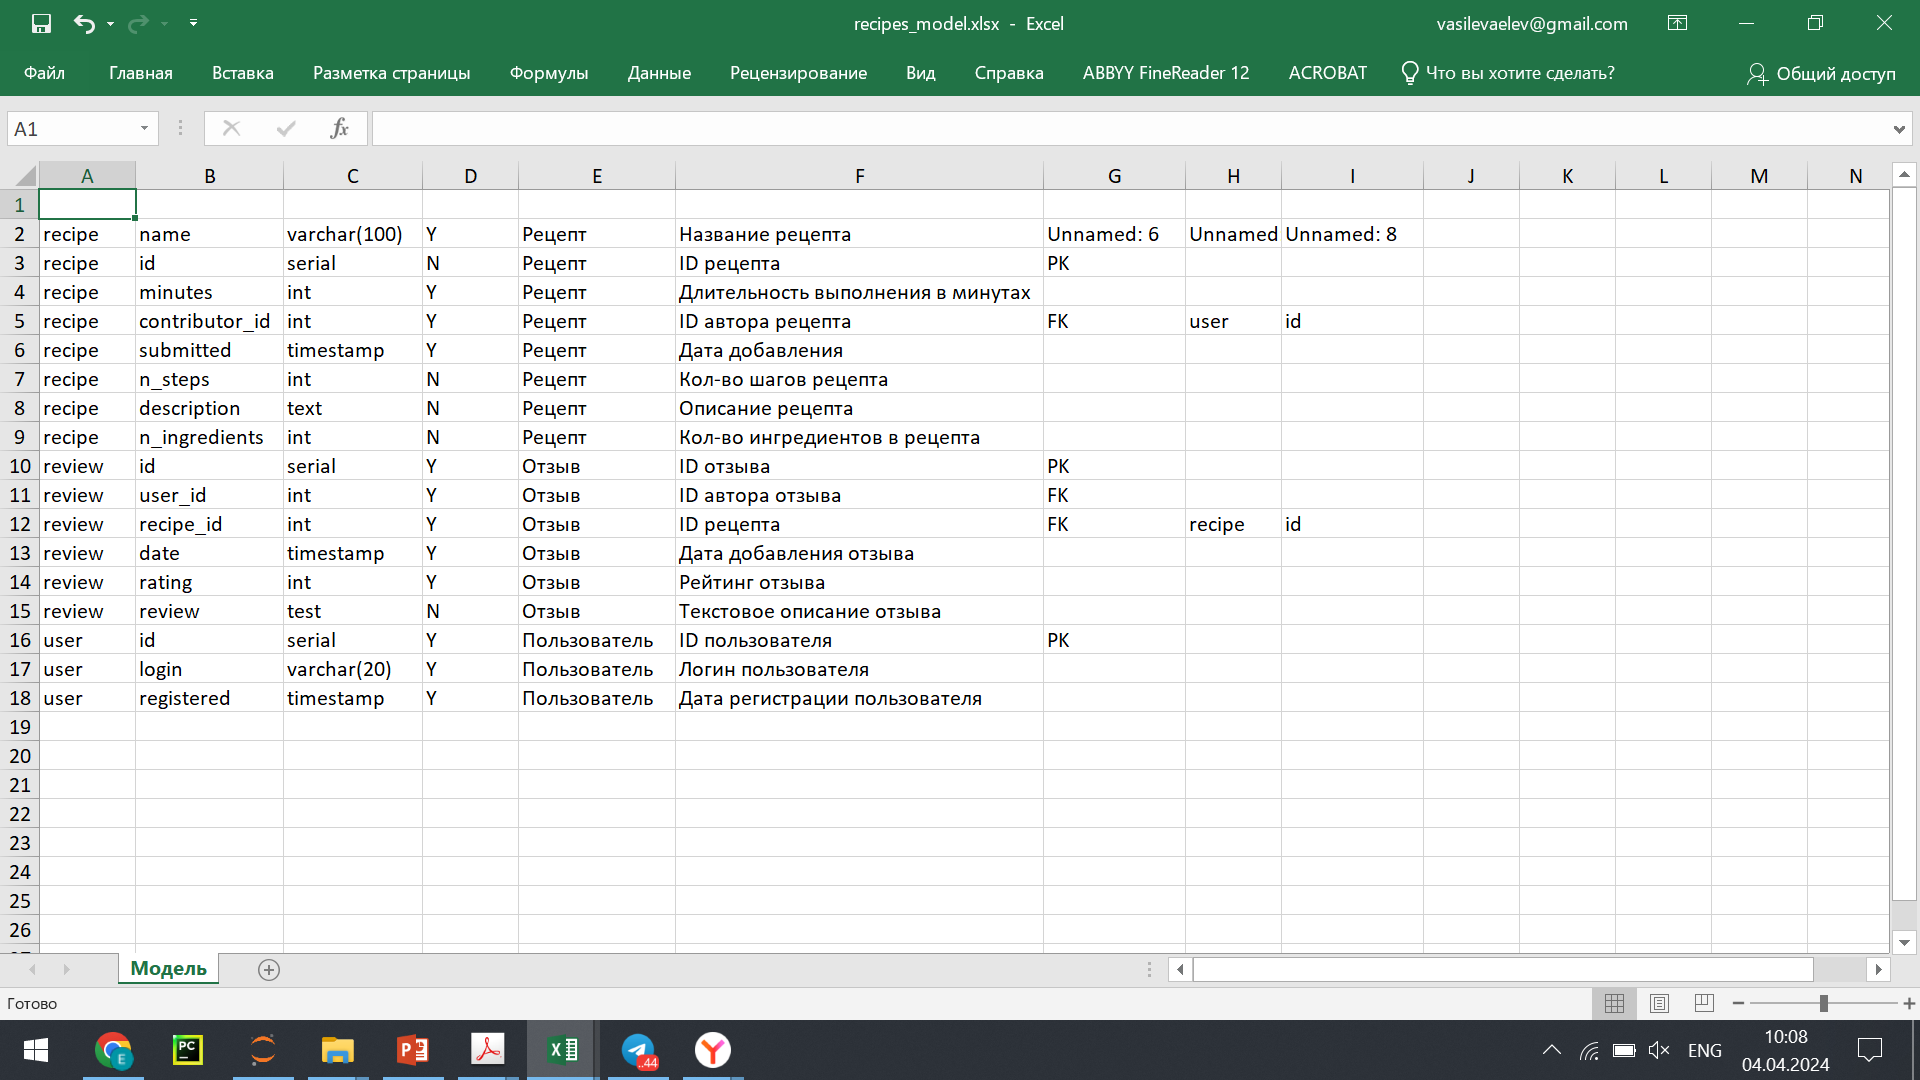

In [188]:
from IPython.display import Image
Image('C:/Users/Elizabeth/Pictures/Screenshots/Снимок экрана (77).png')

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [205]:
sql_code = 'SELECT B, C FROM Модель SELECT G FROM Модель WHERE G = "PRIMARY KEY" IN (SELECT B, C FROM \
Модель WHERE G = "PK") OR G = "REFERENCES" IN (SELECT B, C FROM Модель WHERE G = "FK") \
SELECT H, I FROM Модель SELECT D, G FROM Модель WHERE D = "NOT NULL" IN (SELECT D, G \
FROM Модель WHERE D = "Y" AND G != "PK")'

In [269]:
sht3.range('J2').value = 'sql_code'
sht3.range('J3:J18').value = sql_code

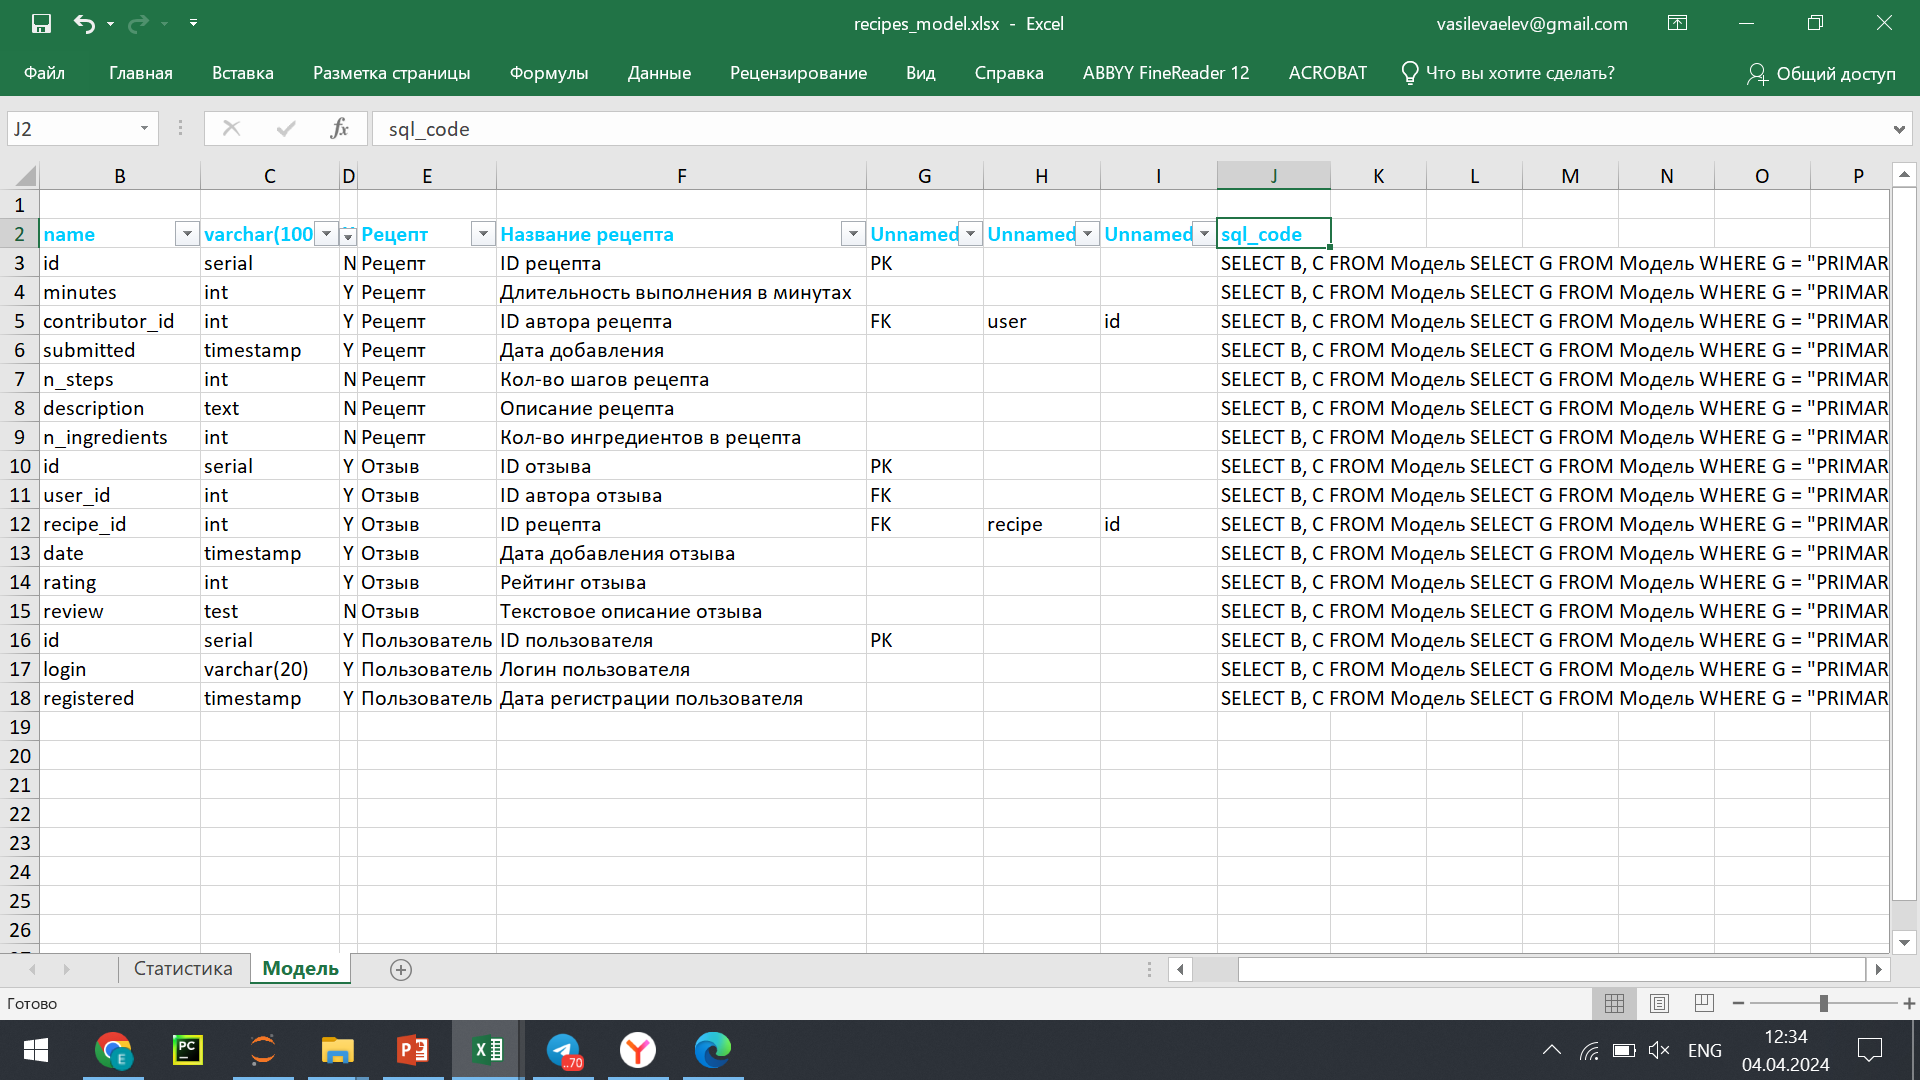

In [212]:
Image('C:/Users/Elizabeth/Pictures/Screenshots/Снимок экрана (80).png')

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [270]:
head = sht3.range('A2:J2')
head.font.color = '00ccff'
head.font.bold = True
wb3.sheets['Модель']['A1'].api.AutoFilter(Filter:=1)

True

In [271]:
for i in 'ABCDEFGHI':
    sht3.range(i+'1').column_width = max(len(sht3.range(i+str(j)).value) if sht3.range(i+str(j)).value is not None else 0 for j in range(1, 19))

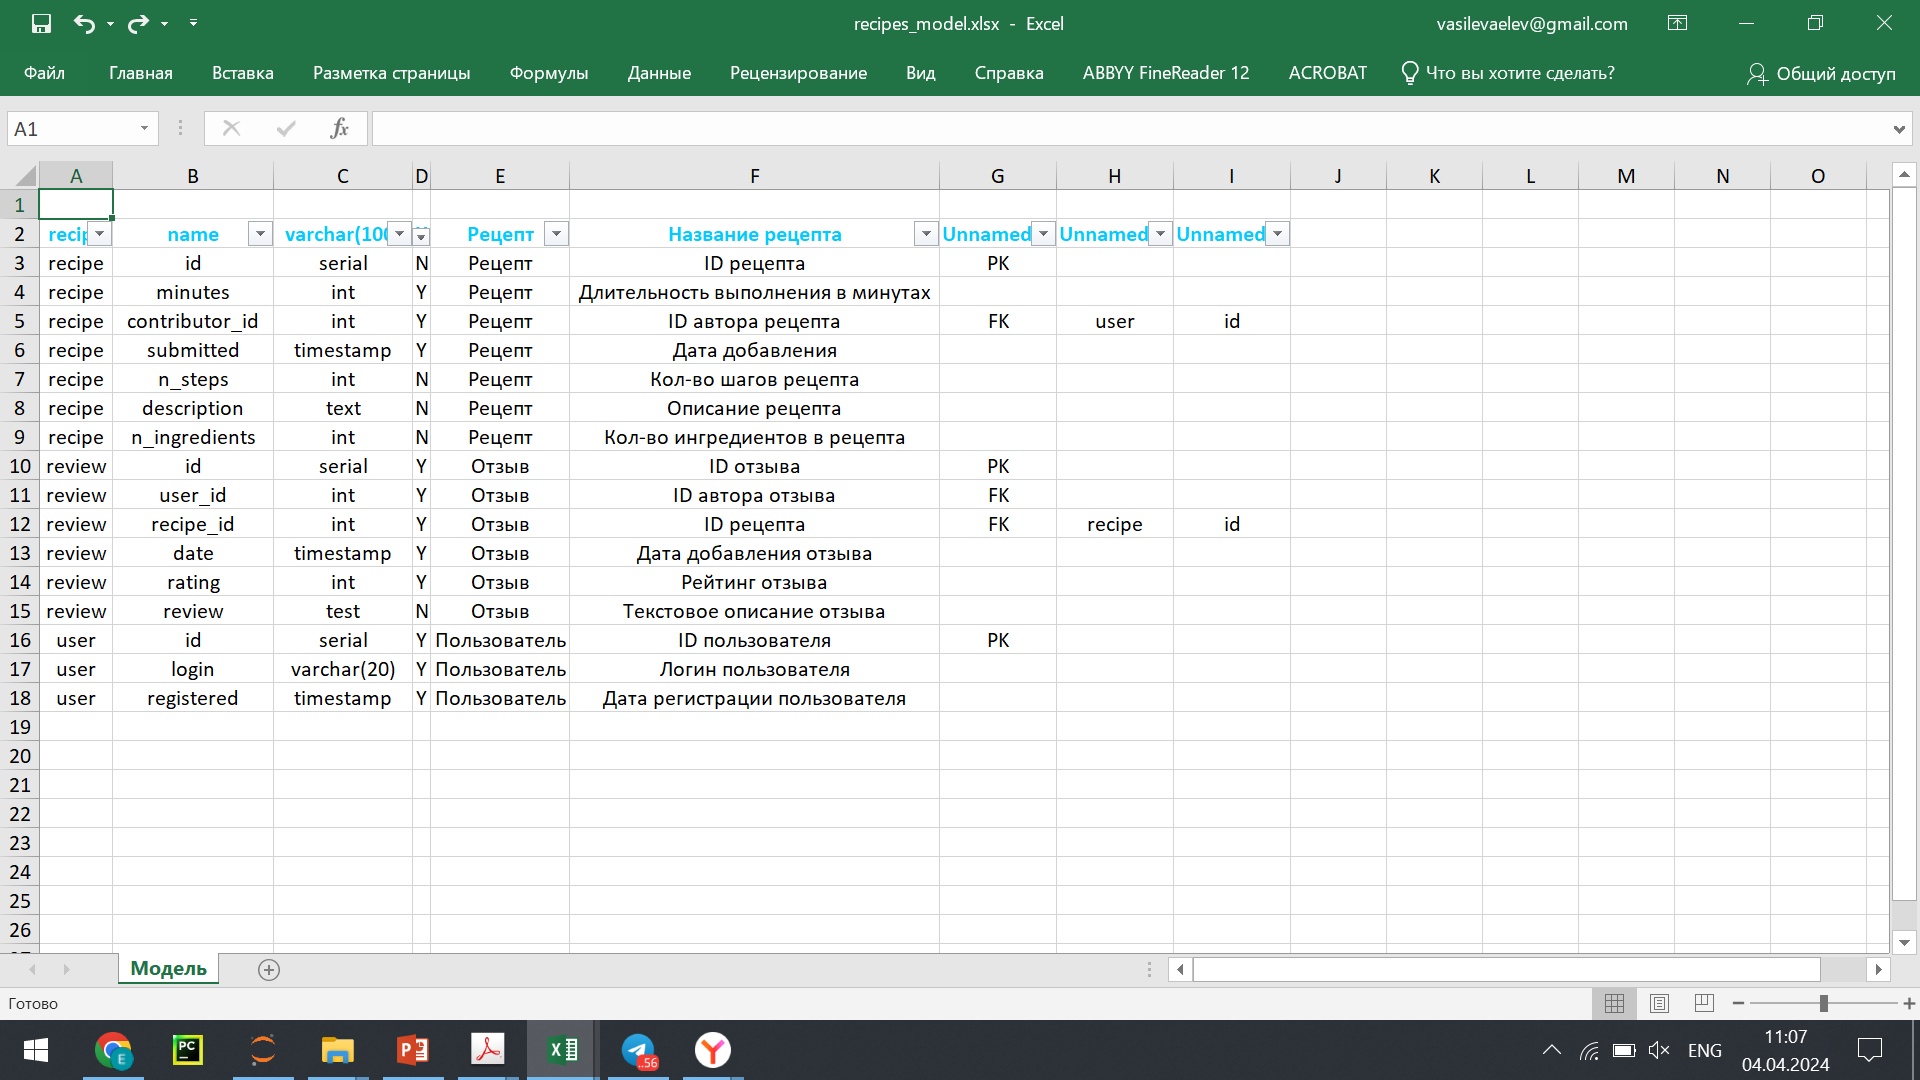

In [192]:
Image('C:/Users/Elizabeth/Pictures/Screenshots/Снимок экрана (79).png')

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [272]:
stats = []

for i in range(3, 19):
    attrs = sht3.range('A'+str(i)+':J'+str(i)).value
    stats.append(len(attrs) - attrs.count(None))

In [273]:
stats = np.array([stats]).reshape(16, 1)

In [274]:
wb3.sheets.add(name='Статистика')

<Sheet [recipes_model.xlsx]Статистика>

In [275]:
stat_sht = wb3.sheets['Статистика']

'''stat_sht.range('A1').value = 'Self'
stat_sht.range('B1').value = 'Num_Attr'
stat_sht.range('A2').value = list(range(1, 17))
stat_sht.range('B2').value = stats'''

"stat_sht.range('A1').value = 'Self'\nstat_sht.range('B1').value = 'Num_Attr'\nstat_sht.range('A2').value = list(range(1, 17))\nstat_sht.range('B2').value = stats"

In [276]:
stat_sht.range('A1').value = stats

In [277]:
chart = stat_sht.charts.add(left=192, top=15)
chart.set_source_data(stat_sht.range('A1').expand())

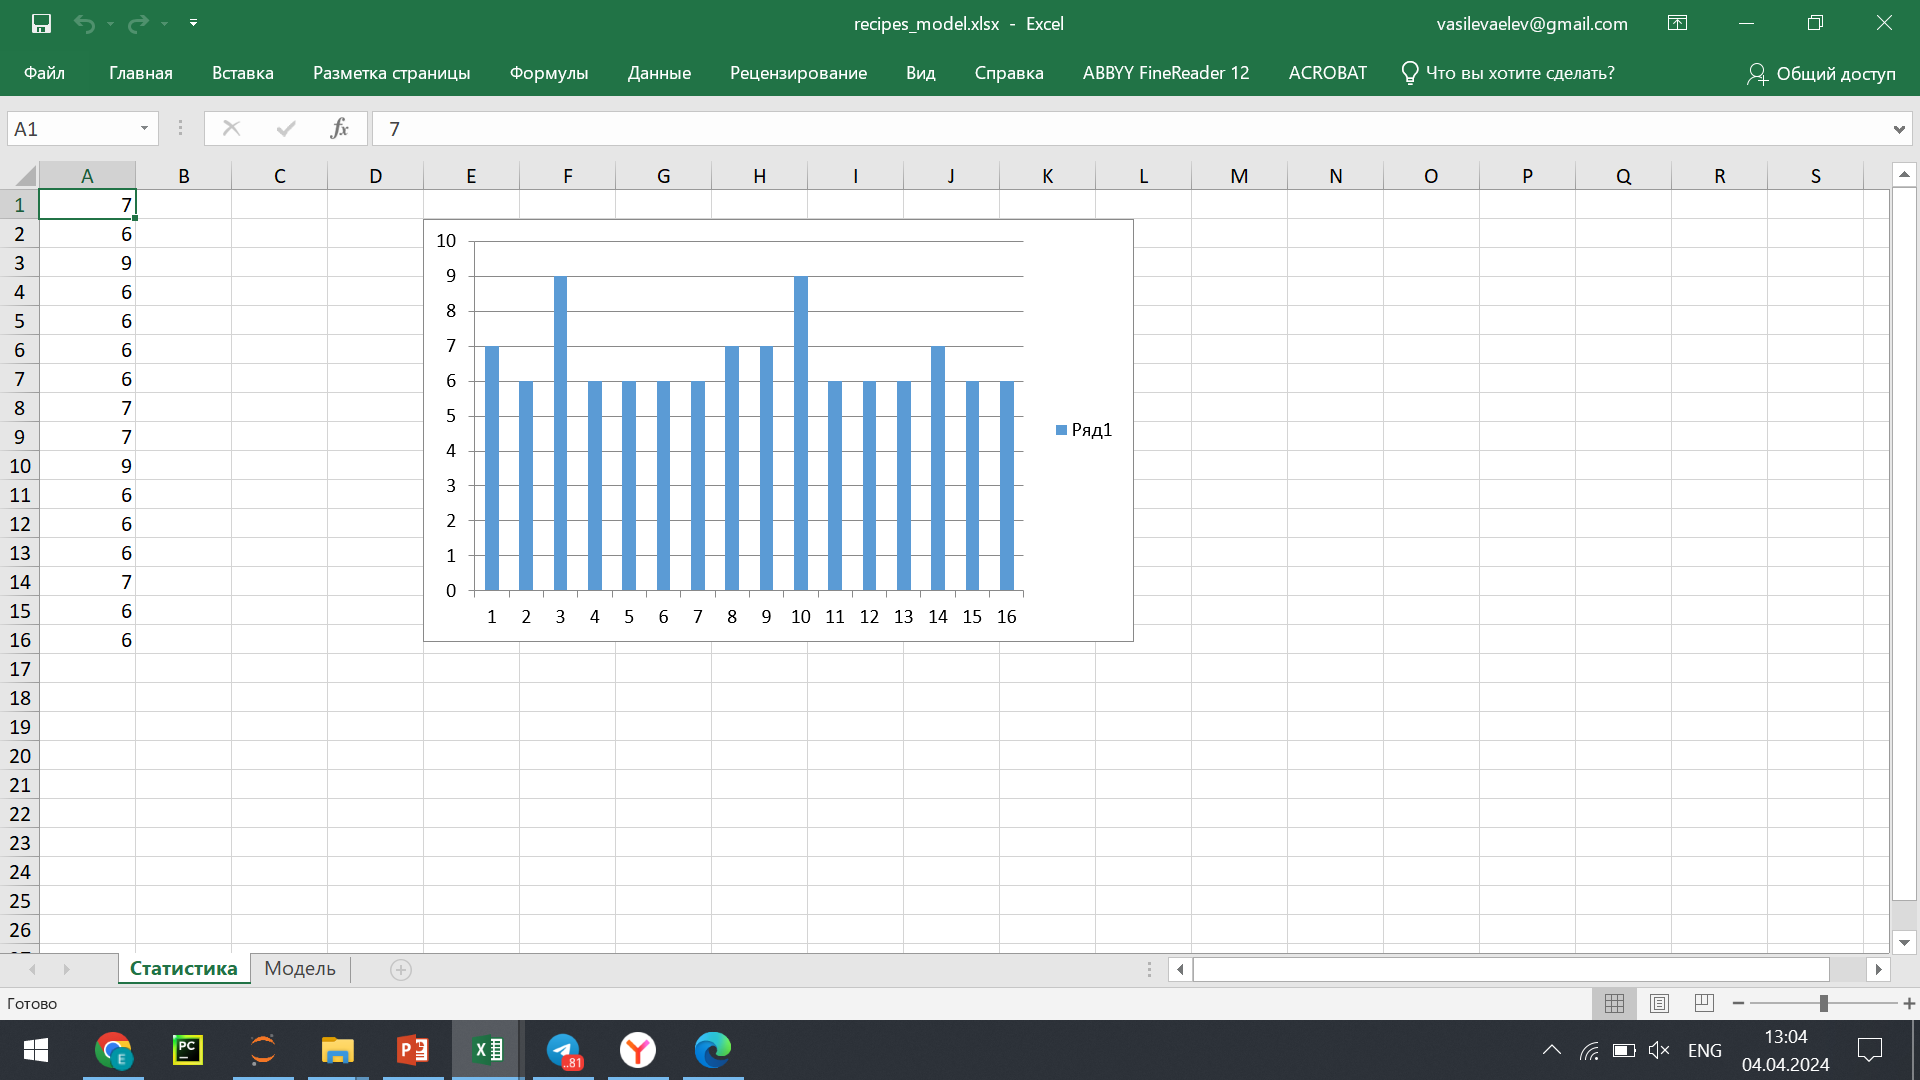

In [256]:
Image('C:/Users/Elizabeth/Pictures/Screenshots/Снимок экрана (81).png')